In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Promethion48_TMO = 5,37e-02
Promethion48_keepup = 2,78e-02		
Promethion24_TMO = 2,69e-02
Promethion24_keepup = 1,39e-02

A100x8_speed_hac = 525244000
V100_speed_hac = 20104100
V100x2_speed_hac = 2*V100_speed_hac

A100x8_speed_sup = 99348920
V100_speed_sup = 3788265
V100x2_speed_sup = 2*V100_speed_sup

hac_setup_expected_speed = [A100x8_speed_hac,
                        A100x8_speed_hac+V100x2_speed_hac,
                        A100x8_speed_hac*2]

hac_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in hac_setup_expected_speed]

sup_setup_expected_speed = [A100x8_speed_sup,
                        A100x8_speed_sup+V100x2_speed_sup,
                        A100x8_speed_sup*2,
                        2*A100x8_speed_sup+1*V100x2_speed_sup,
                        2*A100x8_speed_sup+2*V100x2_speed_sup,
                        2*A100x8_speed_sup+3*V100x2_speed_sup,
                        2*A100x8_speed_sup+4*V100x2_speed_sup]

sup_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in sup_setup_expected_speed]

#I need to calculate the theorical time
#calculate the samples or the Gb processed by the run and then calculate what time
#it would take using the baseline speed of each unit used in that model
size_hac_runs = 0.5*(9.7422E+11+9.7507E+11)
hac_setup_expected_time = [size_hac_runs/speed for speed in hac_setup_expected_speed]

size_sup_runs = 0.5*(8.7035E+11+8.7973E+11)
sup_setup_expected_time = [size_sup_runs/speed for speed in sup_setup_expected_speed]

print('HAC Expected speed')
print(hac_setup_expected_speed)
print()
print('HAC Expected time')
print(hac_setup_expected_time)
print()
df_runs = pd.read_csv('runs_hac.csv')
print(df_runs)
print("------------------------------")
print('SUP Expected speed')
print(sup_setup_expected_speed)
print()
print('SUP Expected time')
print(sup_setup_expected_time)
print()
df_runs_sup = pd.read_csv('runs_sup.csv')
print(df_runs_sup)



HAC Expected speed
[525244000, 565452200, 1050488000]

HAC Expected time
[1855.6042524997906, 1723.6558633957034, 927.8021262498953]

             Setup  samples/s-sum  Gb/s-sum  total-time
0        hac_1_dgx    494000000.0    0.0494      2473.0
1  hac_1_dgx-1_gpu    537000000.0    0.0537      1995.0
2        hac_2_dgx    953000000.0    0.0953      1213.0
------------------------------
SUP Expected speed
[99348920, 106925450, 198697840, 206274370, 213850900, 221427430, 229003960]

SUP Expected time
[8807.745469200872, 8183.645708294892, 4403.872734600436, 4242.11694356405, 4091.822854147446, 3951.8139193504617, 3821.0692950462517]

                setups  samples/s-sum  Gb/s-sum  total-time
0        run_sup_1_dgx     96334000.0  0.009633      9309.0
1  run_sup_1_dgx-1_gpu    104540000.0  0.010454      8753.0
2        run_sup_2_dgx    192160000.0  0.019216      5077.0
3  run_sup_2_dgx-1_gpu    200180000.0  0.020018      4557.0
4  run_sup_2_dgx-2_gpu    207690000.0  0.020769      5024.0


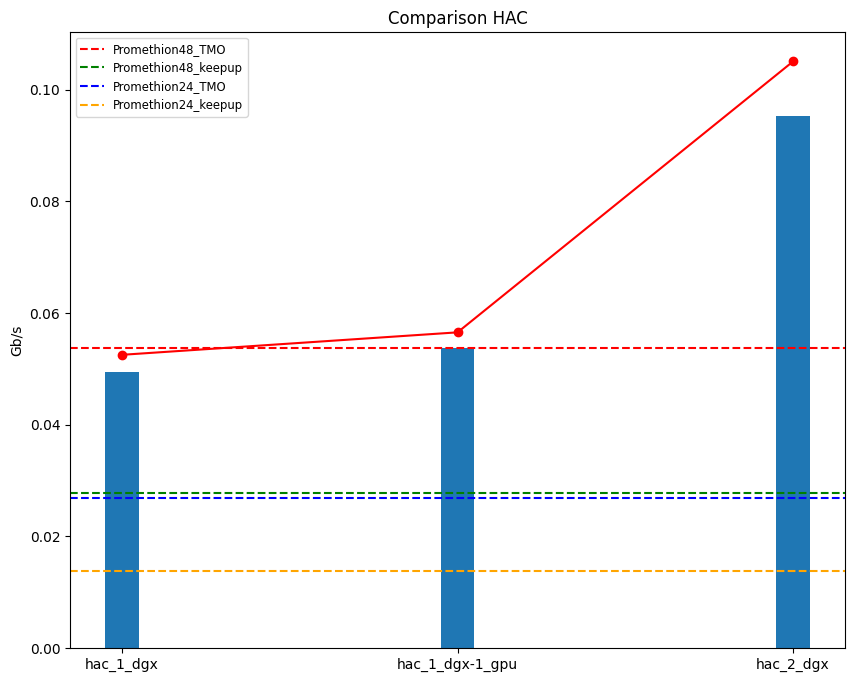

In [2]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs['Setup']
gbps_values = df_runs['Gb/s-sum']

# Create a bar plot
bars = plt.bar(setup_values, gbps_values, width=0.1)
dots = plt.plot(df_runs['Setup'],hac_setup_expected_speed_Gb, marker = 'o', color='red')

# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison HAC')
plt.ylabel('Gb/s')

# Rotate x-axis labels
plt.xticks(rotation=0)
# Make legend smaller
ax.legend(fontsize='small')

plt.show()

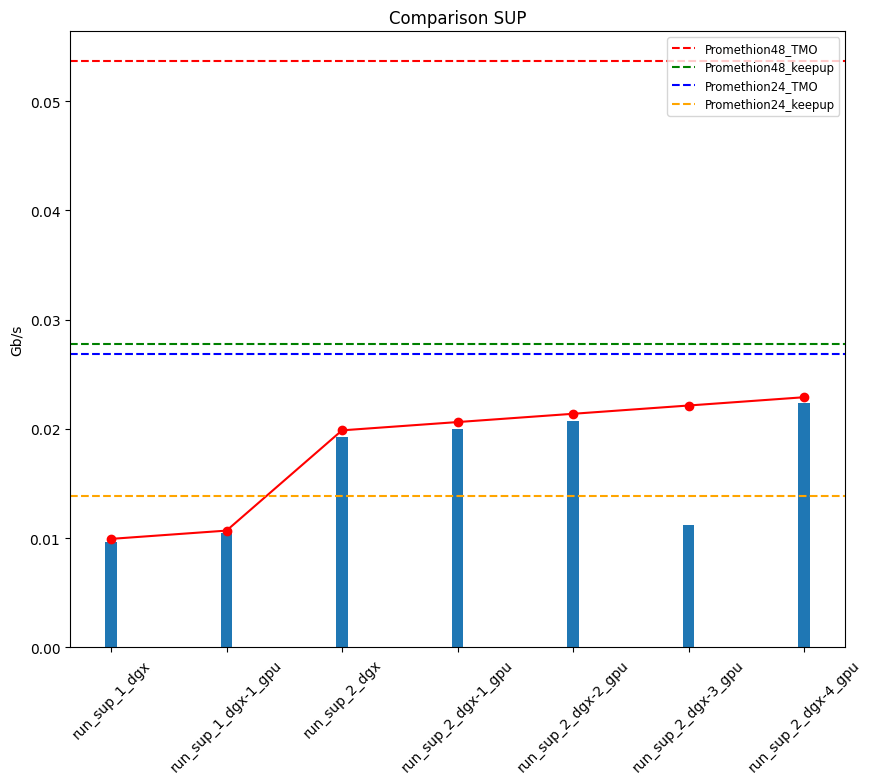

In [3]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs_sup['setups']
gbps_values = df_runs_sup['Gb/s-sum']

# Create a bar plot
bars = plt.bar(setup_values, gbps_values, width=0.1)
dots = plt.plot(df_runs_sup['setups'],sup_setup_expected_speed_Gb, marker = 'o', color='red')

# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison SUP')
plt.ylabel('Gb/s')

# Rotate x-axis labels
plt.xticks(rotation=45)
# Make legend smaller
ax.legend(fontsize='small')

plt.show()


0     93.930644
1    110.450199
2    286.838629
3    302.983747
4    318.102180
5    125.548501
6    349.587172
Name: samples/s-sum, dtype: float64


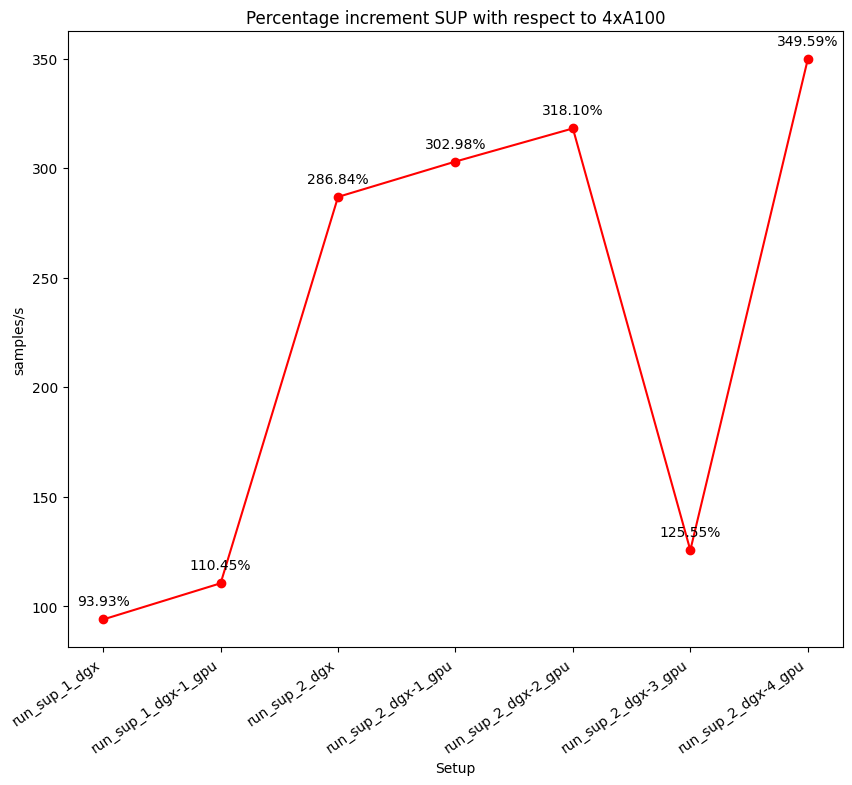

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

setup_values = df_runs_sup['setups']
gbps_increment = ((df_runs_sup["samples/s-sum"] - 0.5*A100x8_speed_sup) / (0.5*A100x8_speed_sup)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_sup['setups'], gbps_increment, marker='o', color='red', label='Percentage Increment')

for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{gbps_increment[i]:.2f}%', (setup_values[i], gbps_increment[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Percentage increment SUP with respect to 4xA100')
plt.ylabel('samples/s')
plt.xlabel('Setup')

plt.xticks(rotation=35, ha='right')

# Show the plot
plt.show()


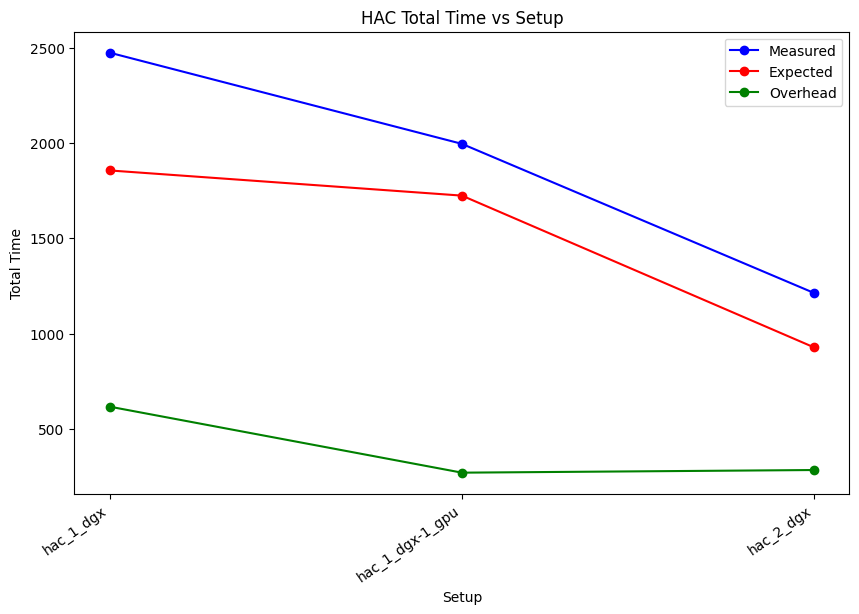

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs['Setup'], df_runs['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs['Setup'], hac_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs['Setup'], df_runs['total-time']-hac_setup_expected_time, marker='o', color='green', label='Overhead')


plt.xlabel('Setup')
plt.ylabel('Total Time')

plt.title('HAC Total Time vs Setup')

plt.xticks(rotation=35, ha='right')
plt.legend()

plt.show()


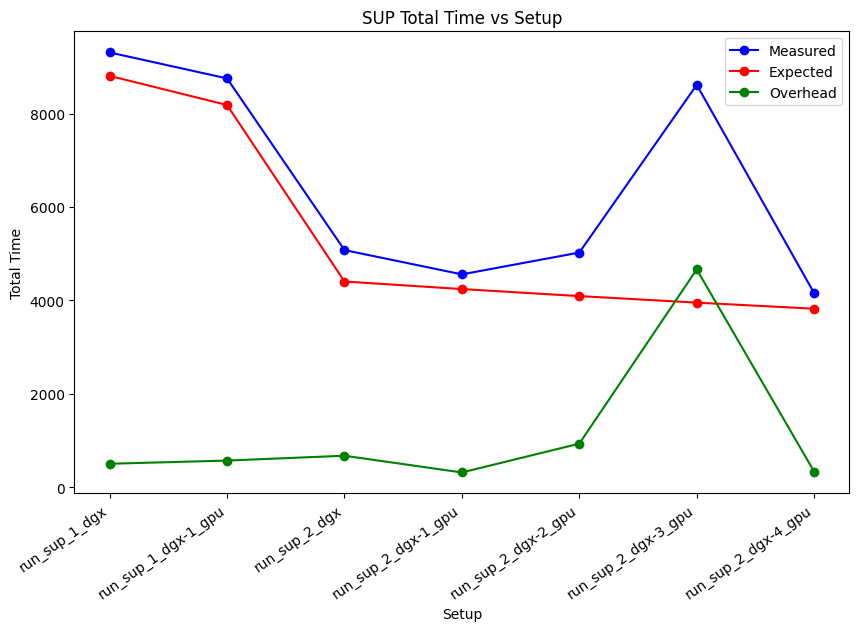

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs_sup['setups'], df_runs_sup['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs_sup['setups'], sup_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs_sup['setups'], df_runs_sup['total-time']-sup_setup_expected_time, marker='o', color='green', label='Overhead')


plt.xlabel('Setup')
plt.ylabel('Total Time')
plt.title('SUP Total Time vs Setup')

plt.xticks(rotation=35, ha='right')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


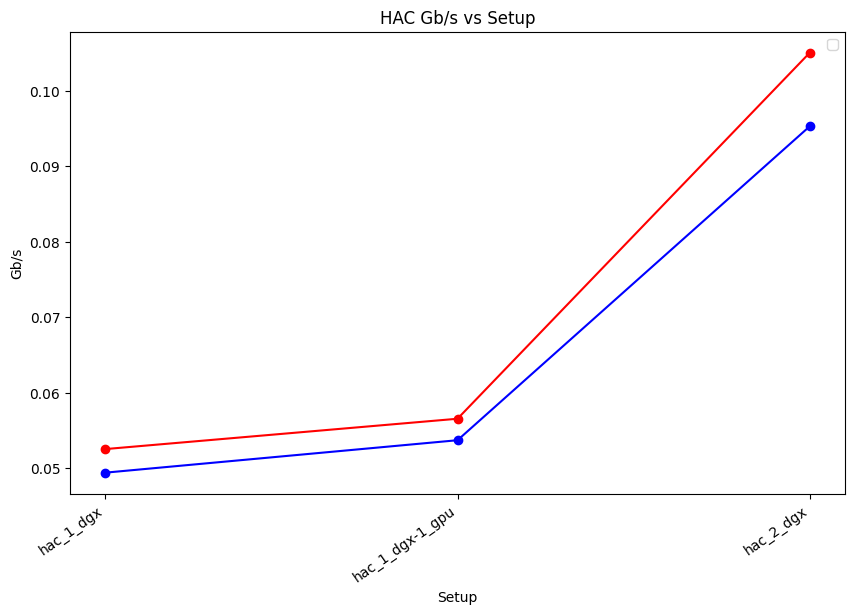

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs['Setup'], df_runs['Gb/s-sum'], marker='o', color='blue')
plt.xlabel('Setup')
plt.ylabel('Gb/s')
plt.title('HAC Gb/s vs Setup')

# Plotting dashed lines to x-axis
#for i, row in df_runs.iterrows():
    #plt.vlines(row['Setup'], 0, hac_setup_expected_speed[i], linestyles='dashed', colors='gray')

plt.plot(df_runs['Setup'],hac_setup_expected_speed_Gb, marker = 'o', color='red')
plt.xticks(rotation=35, ha='right')
plt.legend()

plt.show()

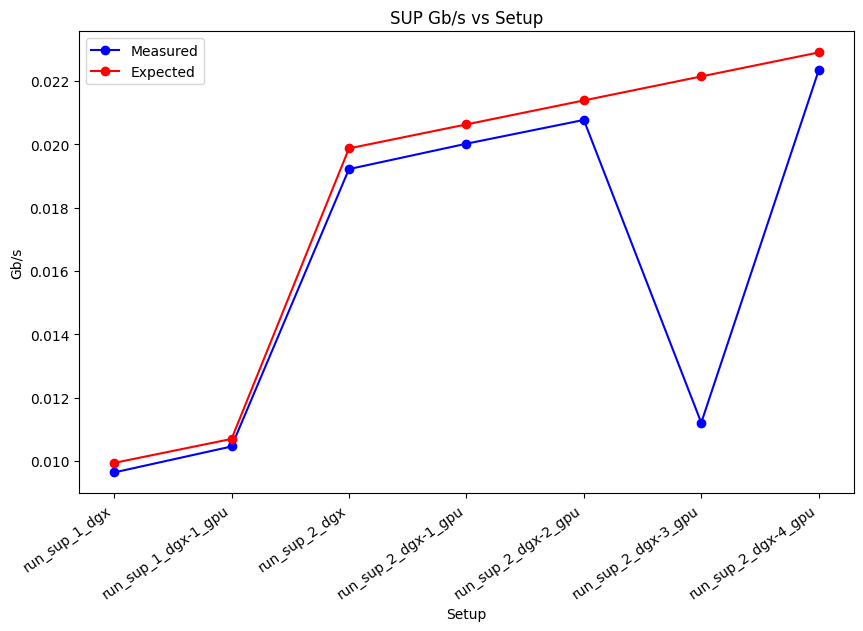

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs_sup['setups'], df_runs_sup['Gb/s-sum'], marker='o', color='blue', label='Measured')
plt.xlabel('Setup')
plt.ylabel('Gb/s')
plt.title('SUP Gb/s vs Setup')

# Plotting dashed lines to x-axis
#for i, row in df_runs.iterrows():
    #plt.vlines(row['Setup'], 0, hac_setup_expected_speed[i], linestyles='dashed', colors='gray')

plt.plot(df_runs_sup['setups'],sup_setup_expected_speed_Gb, marker = 'o', color='red', label='Expected')
plt.xticks(rotation=35, ha='right')
plt.legend()

plt.show()